<a href="https://colab.research.google.com/github/YashDg3046/Projects/blob/main/MAJOR_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving cardio_train_dataset.csv to cardio_train_dataset.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ds = pd.read_csv('cardio_train_dataset.csv', sep=';')
ds['age'] = ds['age'] // 365
ds

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
print("(Rows, Columns): " + str(ds.shape))
ds.columns

(Rows, Columns): (70000, 13)


Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [5]:
ds.nunique(axis=0)

id             70000
age               28
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

In [6]:
print(ds.isna().sum())

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [7]:
ds['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

<Axes: >

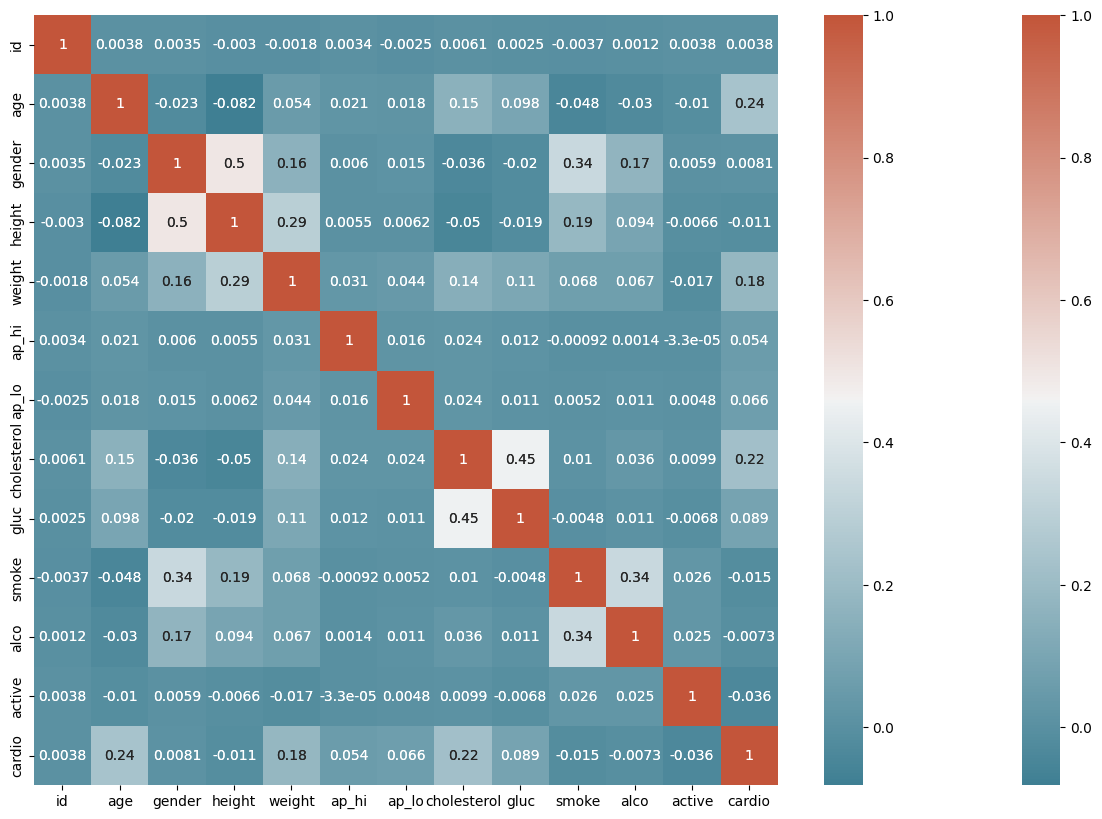

In [8]:
corr = ds.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

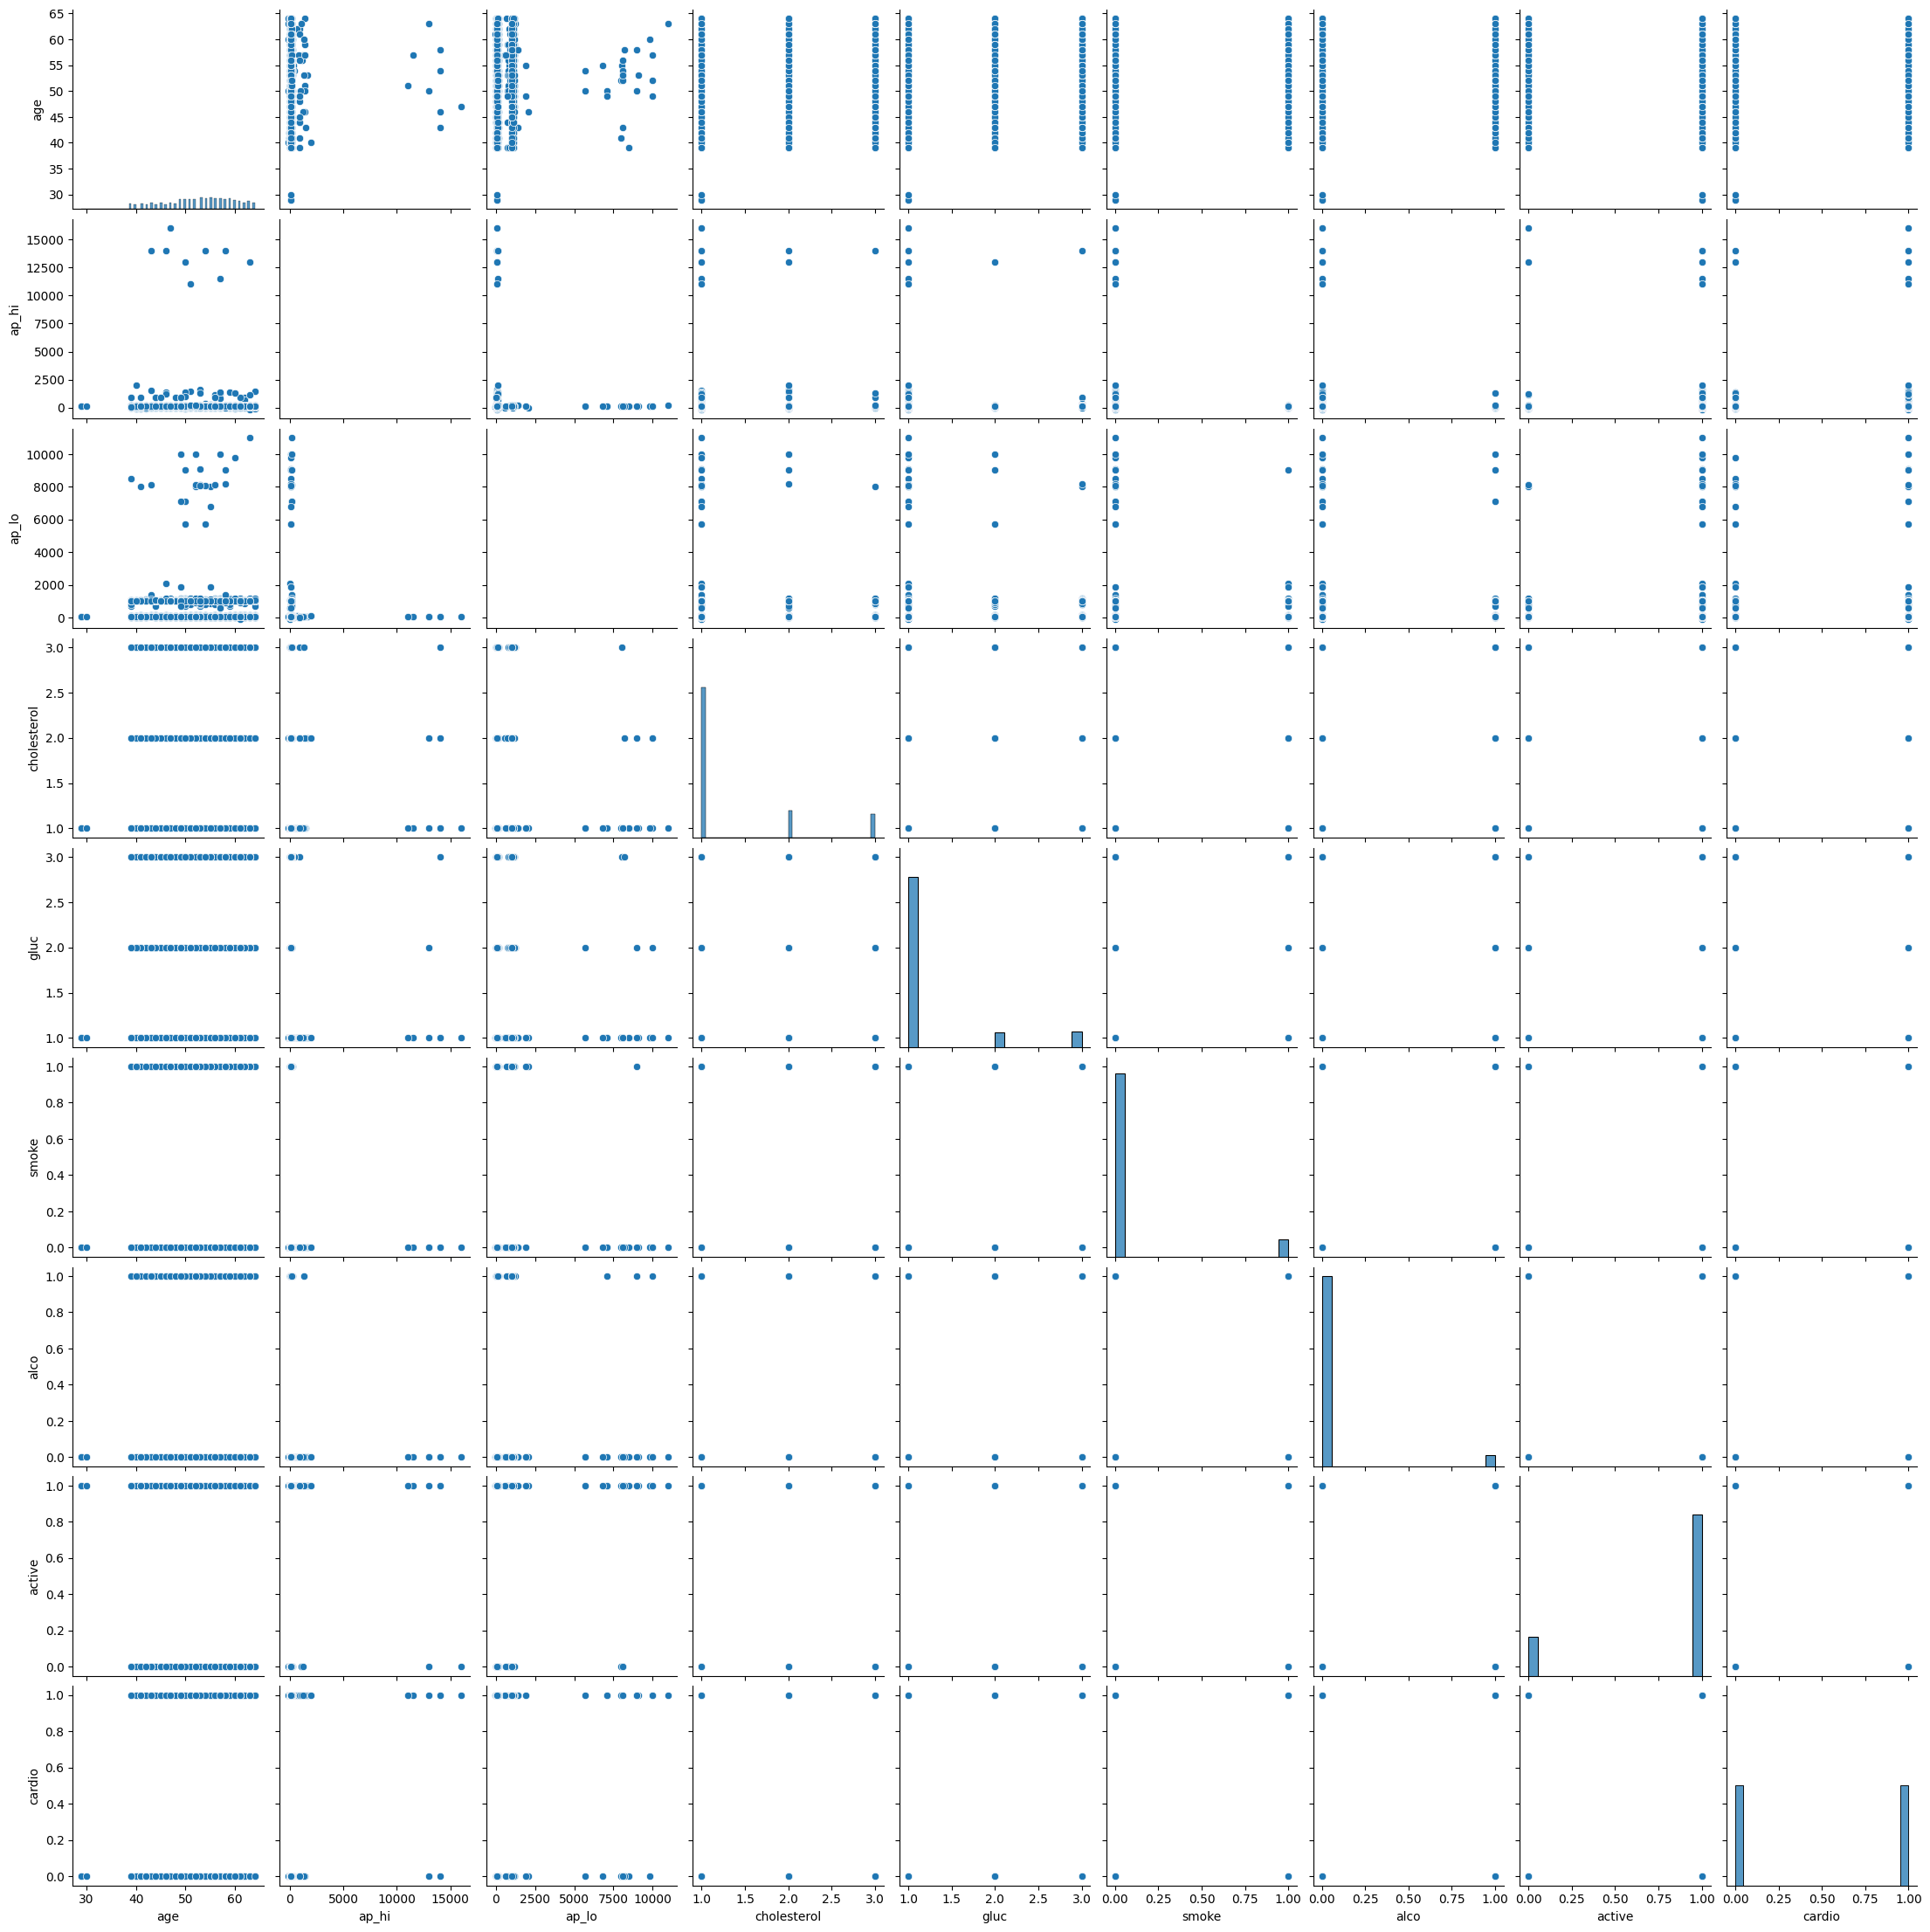

In [9]:
subds = ds[['age','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','cardio']]
sns.pairplot(subds)

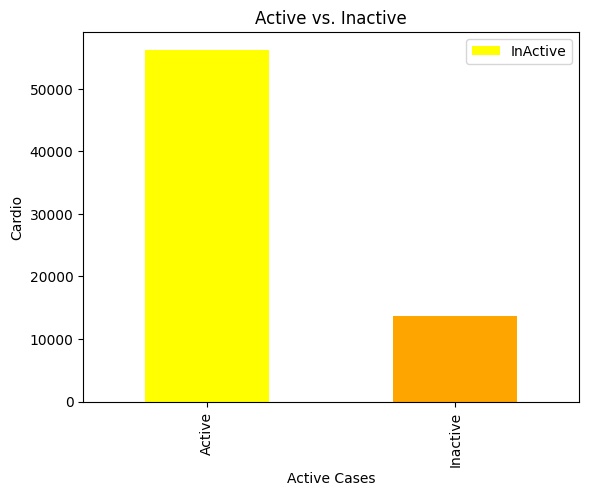

In [ ]:
ds['active_label'] = ds['active'].map({1: 'Active', 0: 'Inactive'})
ds['active_label'].value_counts().plot(kind='bar', color=['yellow', 'orange'])
plt.title('Active vs. Inactive')
plt.xlabel('Active Cases')
plt.ylabel('Cardio')
plt.legend(labels=['InActive', 'Active'])

Text(0, 0.5, 'Age')

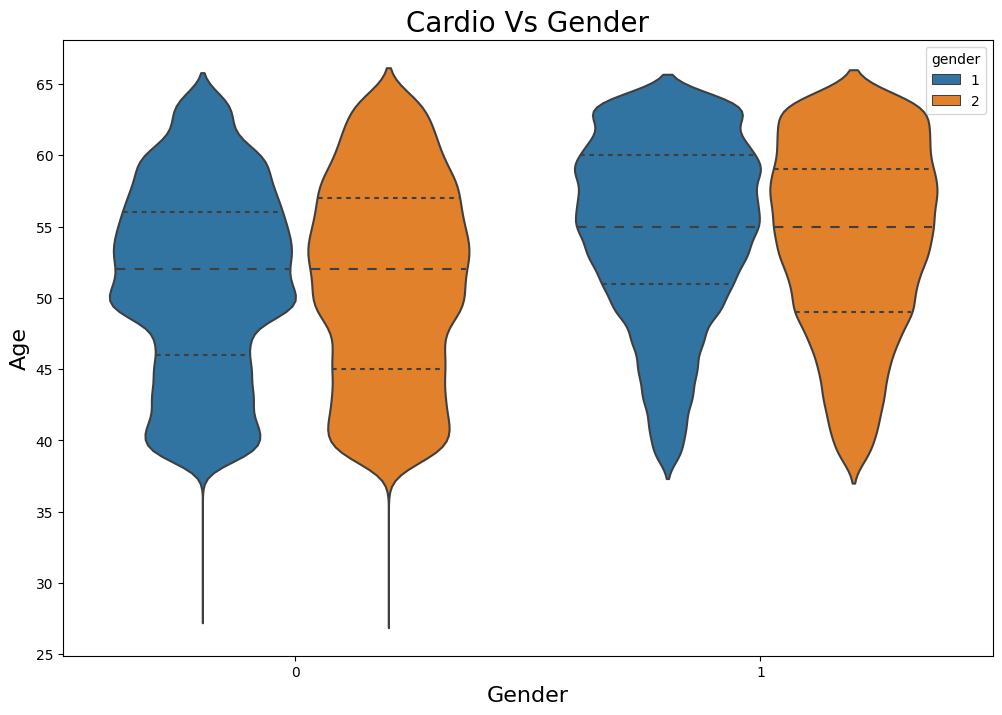

In [21]:
plt.figure(figsize=(12,8))
sns.violinplot(x= 'cardio', y= 'age',hue="gender", inner='quartile',data= ds )
plt.title("Cardio Vs Gender",fontsize=20)
plt.xlabel("Gender", fontsize=16)
plt.ylabel("Age", fontsize=16)

Text(0, 0.5, '')

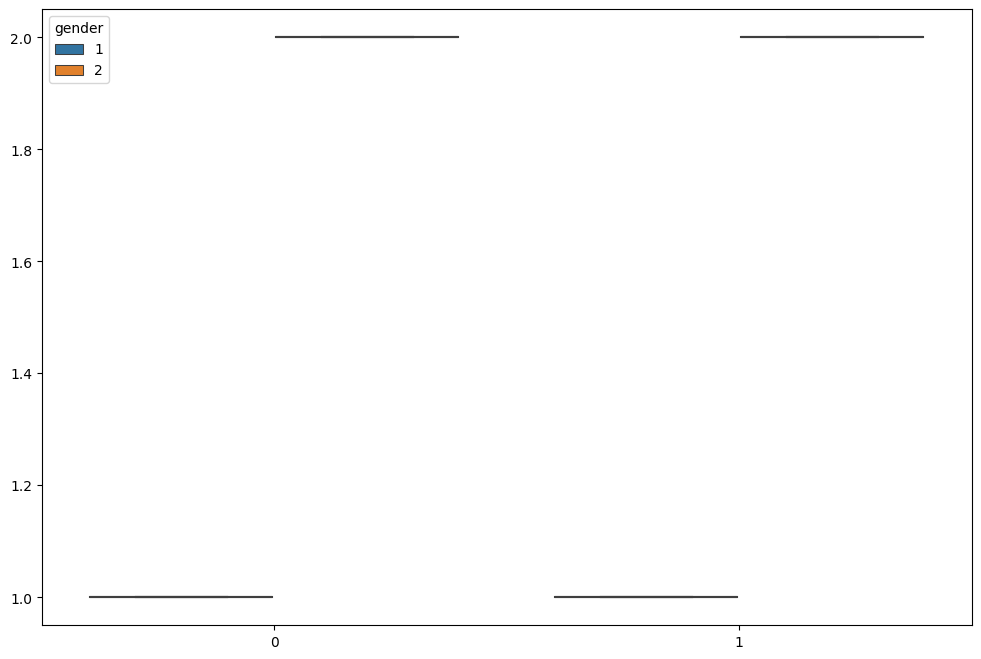

In [38]:
plt.figure(figsize=(12,8))
sns.boxplot(x= 'active', y= 'gender',hue="gender", data=ds )
plt.title("", fontsize=20)
plt.xlabel("",fontsize=16)
plt.ylabel("", fontsize=16)

In [34]:
neg_data = ds[ds['cardio']==1]
neg_data.describe()
pos_data = ds[ds['cardio']==0]
pos_data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,35021.000000,35021.000000,35021.000000,35021.000000,35021.000000,35021.000000,35021.000000,35021.000000,35021.000000,35021.000000,35021.000000,35021.000000,35021.0
mean,49862.869107,51.231261,1.345707,164.448017,71.592150,120.432598,84.251763,1.216527,1.175380,0.092516,0.055424,0.817881,0.0
std,28867.831291,6.783206,0.475605,8.148950,13.305122,103.550672,152.686959,0.526973,0.509611,0.289757,0.228809,0.385948,0.0
min,0.000000,29.000000,1.000000,59.000000,22.000000,-120.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0
25%,24716.000000,46.000000,1.000000,159.000000,63.000000,110.000000,70.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.0
50%,49876.000000,52.000000,1.000000,165.000000,70.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.0
75%,74729.000000,57.000000,2.000000,170.000000,79.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.0
max,99999.000000,64.000000,2.000000,207.000000,200.000000,14020.000000,9800.000000,3.000000,3.000000,1.000000,1.000000,1.000000,0.0


In [44]:
print("Positive Cardio Patients" + str(pos_data['cardio'].mean()))
print("Nega tive Cardio Patients): " + str(neg_data['cardio'].mean()))

(Positive Patients ST depression): 0.0
(Negative Patients ST depression): 1.0


In [46]:
print("(Positive Patients thalach): " + str(pos_data['active'].mean()))
print("(Negative Patients thalach): " + str(neg_data['active'].mean()))

(Positive Patients thalach): 0.8178807001513377
(Negative Patients thalach): 0.7895594499556877


In [45]:
X = ds.iloc[:, :-1].values
y = ds.iloc[:, -1].values

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [49]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=1) # get instance of model
model1.fit(x_train, y_train) # Train/Fit model

y_pred1 = model1.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred1)) # output accuracy

              precision    recall  f1-score   support

           0       0.70      0.77      0.73      6917
           1       0.75      0.68      0.71      7083

    accuracy                           0.72     14000
   macro avg       0.73      0.72      0.72     14000
weighted avg       0.73      0.72      0.72     14000



In [50]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier() # get instance of model
model2.fit(x_train, y_train) # Train/Fit model

y_pred2 = model2.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred2)) # output accuracy

              precision    recall  f1-score   support

           0       0.61      0.66      0.64      6917
           1       0.64      0.59      0.62      7083

    accuracy                           0.63     14000
   macro avg       0.63      0.63      0.63     14000
weighted avg       0.63      0.63      0.63     14000



In [51]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC

model3 = SVC(random_state=1) # get instance of model
model3.fit(x_train, y_train) # Train/Fit model

y_pred3 = model3.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred3)) # output accuracy

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      6917
           1       0.75      0.69      0.72      7083

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



In [ ]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

model4 = GaussianNB() # get instance of model
model4.fit(x_train, y_train) # Train/Fit model

y_pred4 = model4.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred4)) # output accuracy

In [52]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

model6 = RandomForestClassifier(random_state=1)# get instance of model
model6.fit(x_train, y_train) # Train/Fit model

y_pred6 = model6.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred6)) # output accuracy

              precision    recall  f1-score   support

           0       0.71      0.75      0.73      6917
           1       0.74      0.70      0.72      7083

    accuracy                           0.72     14000
   macro avg       0.73      0.72      0.72     14000
weighted avg       0.73      0.72      0.72     14000



In [53]:
from xgboost import XGBClassifier

model7 = XGBClassifier(random_state=1)
model7.fit(x_train, y_train)
y_pred7 = model7.predict(x_test)
print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      6917
           1       0.76      0.70      0.73      7083

    accuracy                           0.73     14000
   macro avg       0.74      0.73      0.73     14000
weighted avg       0.74      0.73      0.73     14000



In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred6)
print(cm)
accuracy_score(y_test, y_pred6)

[[5160 1757]
 [2099 4984]]


0.7245714285714285

In [55]:
# get importance
importance = model6.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.21753
Feature: 1, Score: 0.12950
Feature: 2, Score: 0.01580
Feature: 3, Score: 0.14072
Feature: 4, Score: 0.15713
Feature: 5, Score: 0.16806
Feature: 6, Score: 0.08966
Feature: 7, Score: 0.03739
Feature: 8, Score: 0.01601
Feature: 9, Score: 0.00818
Feature: 10, Score: 0.00714
Feature: 11, Score: 0.01287


<Axes: >

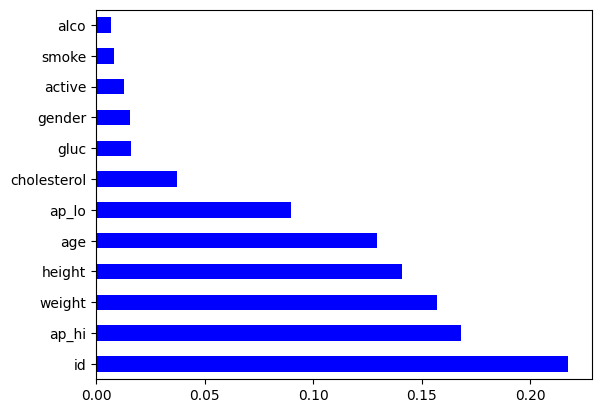

In [57]:
index= ds.columns[:-1]
importance = pd.Series(model6.feature_importances_, index=index)
importance.nlargest(13).plot(kind='barh', colormap='winter')

In [62]:
print(model6.predict(sc.transform([[20,1,2,110,1,1,140,1,2.2,2,0,2]])))

[0]


In [60]:
y_pred = model6.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 1]
 [1 1]
 ...
 [0 0]
 [0 0]
 [1 0]]
